# **1. Perkenalan Dataset**


| Jenis | Keterangan |
|-------|------------|
|Nama   | Global Air Quality (2023) - 6 Cities|
|Sumber | [Kaggle](https://www.kaggle.com/datasets/youssefelebiary/global-air-quality-2023-6-cities/data)|
|Pengelola| [youssefelebiary](https://www.kaggle.com/youssefelebiary)
|Lisensi| MIT|
|Visibilitas| Publik|
|Label| *Social Issues and Advocations, Environment, Pollution, Classification,Regression*|
|Kebergunaan| 10.0|

# **2. Import Library**

In [23]:
# Data Libraries
import pandas as pd    
import numpy as np     
import math            

# Graphing Libraries
import matplotlib.pyplot as plt    
import seaborn as sns              

# Preprocessing Libraries
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler     
from category_encoders import TargetEncoder  

# **3. Memuat Dataset**

In [24]:
air_quality = pd.read_csv(r"C:\Users\ASUS\Documents\GitHub\Membangun-Sistem-Machine-Learning\Eksperimen_SML_Moh-Novil-Maarij\Air_Quality.csv")

In [25]:
air_quality.sample(5)

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
42765,2023-11-18 21:00:00+00:00,New York,209.0,14.5,2.9,62.0,3.2,4.6,24.800000
45537,2023-03-14 09:00:00+00:00,Sydney,79.0,14.1,9.7,33.0,11.8,20.7,27.458334
9980,2023-02-20 20:00:00+00:00,Cairo,405.0,58.4,43.9,29.0,27.0,38.8,60.353336
11618,2023-04-30 02:00:00+00:00,Cairo,188.0,25.6,25.9,53.0,24.4,34.0,38.858334
30564,2023-06-28 12:00:00+00:00,London,258.0,12.0,2.1,44.0,9.8,14.8,20.100002


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [26]:
air_quality.columns

Index(['Date', 'City', 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI'], dtype='object')

In [27]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52560 non-null  object 
 1   City    52560 non-null  object 
 2   CO      52560 non-null  float64
 3   NO2     52560 non-null  float64
 4   SO2     52560 non-null  float64
 5   O3      52560 non-null  float64
 6   PM2.5   52560 non-null  float64
 7   PM10    52560 non-null  float64
 8   AQI     52560 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.6+ MB


In [28]:
air_quality.describe()

,CO,NO2,SO2,O3,PM2.5,PM10,AQI
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,273.372565,28.930514,12.051645,55.304433,18.621792,35.505850,41.941352
std,171.578815,25.473936,14.684127,36.939938,15.897499,41.866614,24.989747
min,48.000000,0.000000,0.000000,0.000000,0.000000,0.100000,8.000000
25%,160.000000,11.100000,2.500000,29.000000,7.100000,11.000000,22.638333
50%,224.000000,22.100000,5.800000,51.000000,13.400000,20.800000,32.400000
75%,335.000000,38.700000,17.300000,74.000000,24.900000,41.700000,61.013332
max,2145.000000,251.900000,200.800000,425.000000,143.400000,550.000000,188.319980


In [29]:
air_quality.isnull().sum()

Date     0
City     0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
AQI      0
dtype: int64

In [30]:
air_quality.duplicated().sum()

0

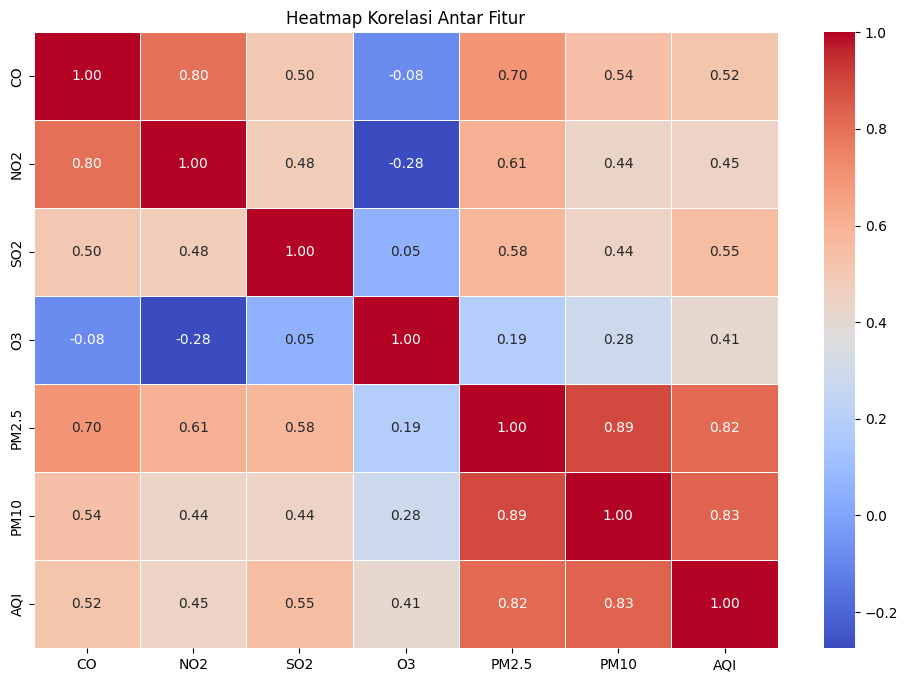

In [31]:
corr_matrix = air_quality.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12456\1879666410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=air_quality['City'], palette='Set2')


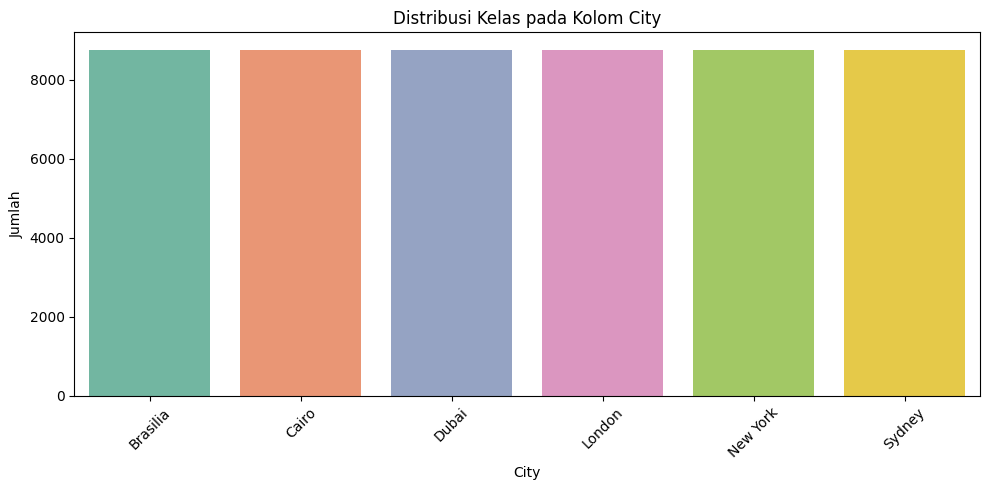

In [32]:
plt.figure(figsize=(10, 5))
sns.countplot(x=air_quality['City'], palette='Set2')
plt.title('Distribusi Kelas pada Kolom City')
plt.xlabel('City')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

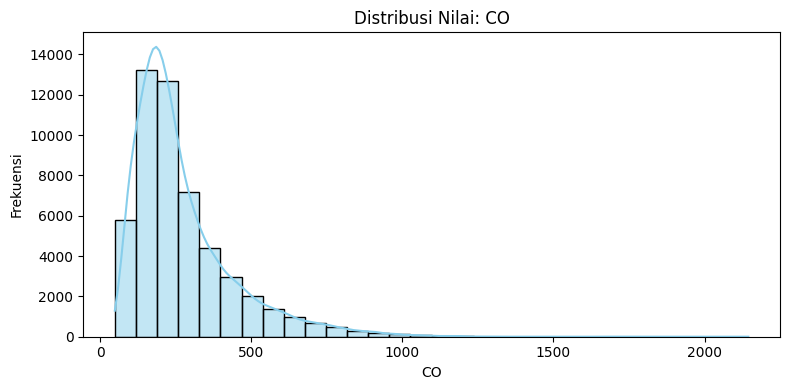

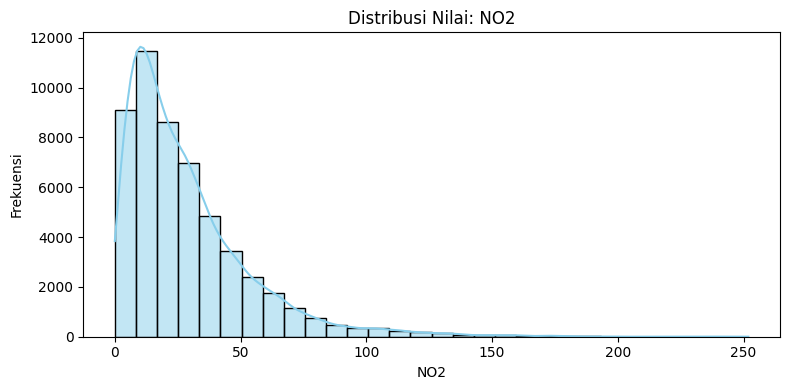

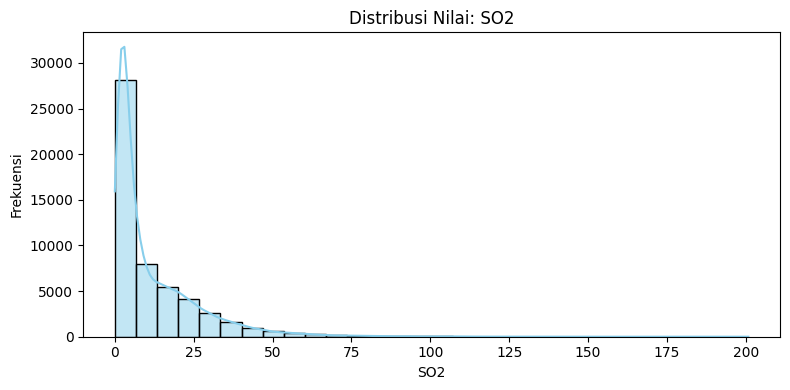

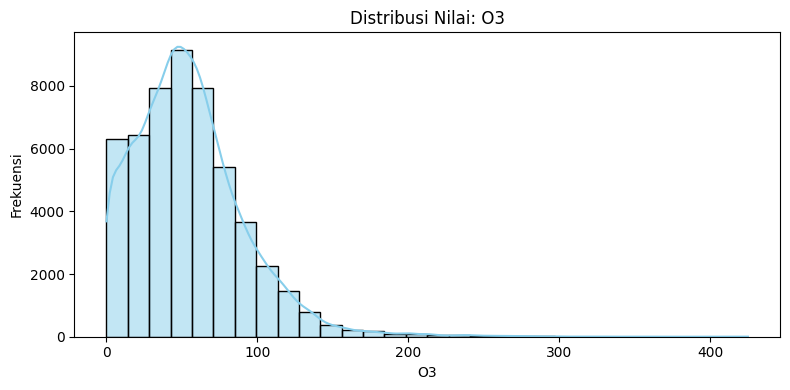

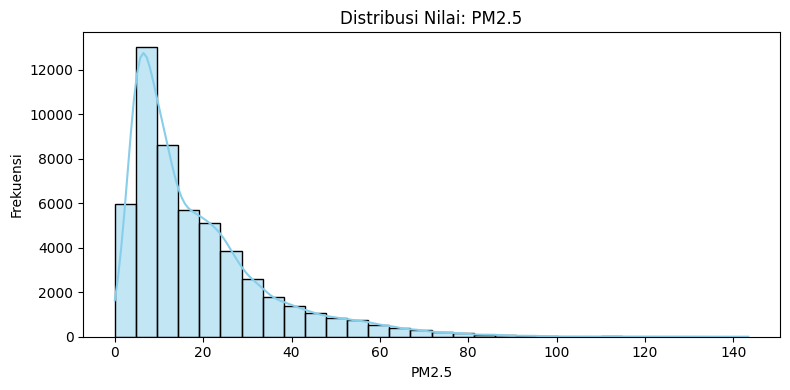

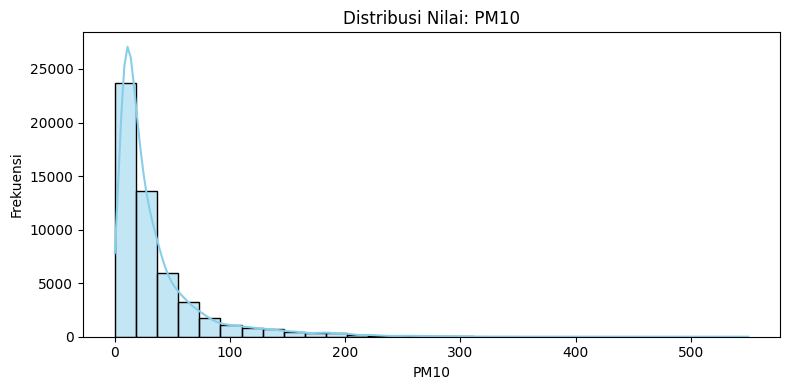

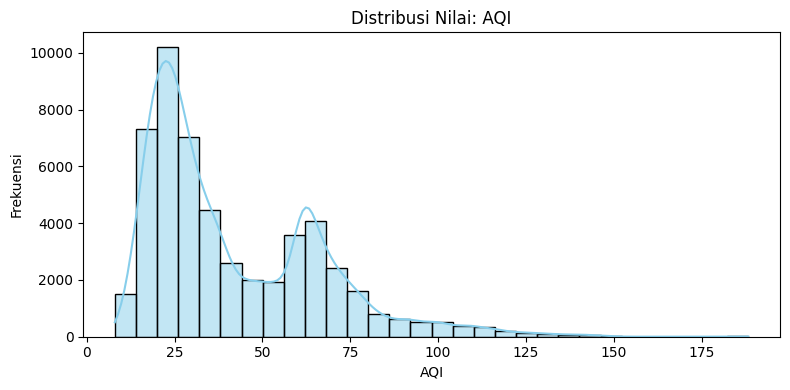

In [33]:
# Daftar kolom yang ingin divisualisasikan
cols = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']

# Visualisasi histogram setiap kolom
for col in cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=air_quality, x=col, kde=True, color='skyblue', bins=30)
    plt.title(f'Distribusi Nilai: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()


In [34]:
# Hitung rata-rata AQI per kota
kota_terbaik = air_quality.groupby('City')['AQI'].mean().sort_values().head(2)
print(kota_terbaik)

City
London      24.793335
Brasilia    25.326759
Name: AQI, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12456\230795314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kota_terbaik.values, y=kota_terbaik.index, palette='Greens_r')


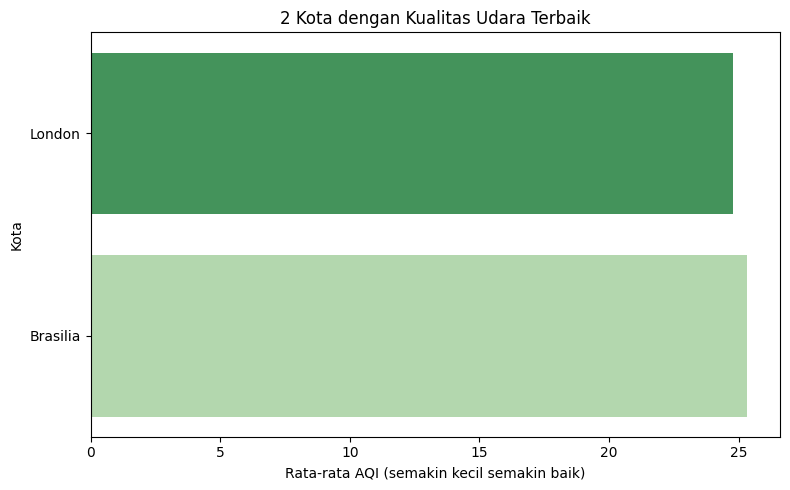

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(x=kota_terbaik.values, y=kota_terbaik.index, palette='Greens_r')
plt.xlabel('Rata-rata AQI (semakin kecil semakin baik)')
plt.ylabel('Kota')
plt.title('2 Kota dengan Kualitas Udara Terbaik')
plt.tight_layout()
plt.show()


In [36]:
kota_terburuk = air_quality.groupby('City')['AQI'].mean().sort_values(ascending=False).head(2)
print(kota_terburuk)

City
Dubai    79.975057
Cairo    58.110697
Name: AQI, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12456\2439389114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kota_terburuk.values, y=kota_terburuk.index, palette=r'Reds_r')


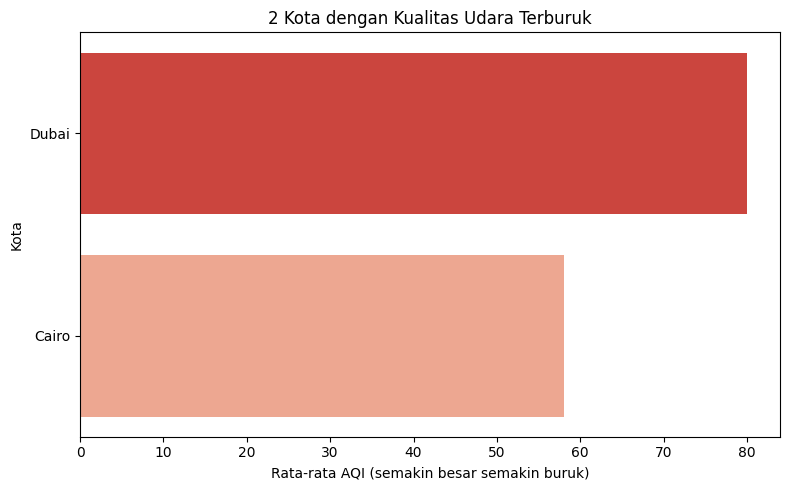

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(x=kota_terburuk.values, y=kota_terburuk.index, palette=r'Reds_r')
plt.xlabel('Rata-rata AQI (semakin besar semakin buruk)')
plt.ylabel('Kota')
plt.title('2 Kota dengan Kualitas Udara Terburuk')
plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

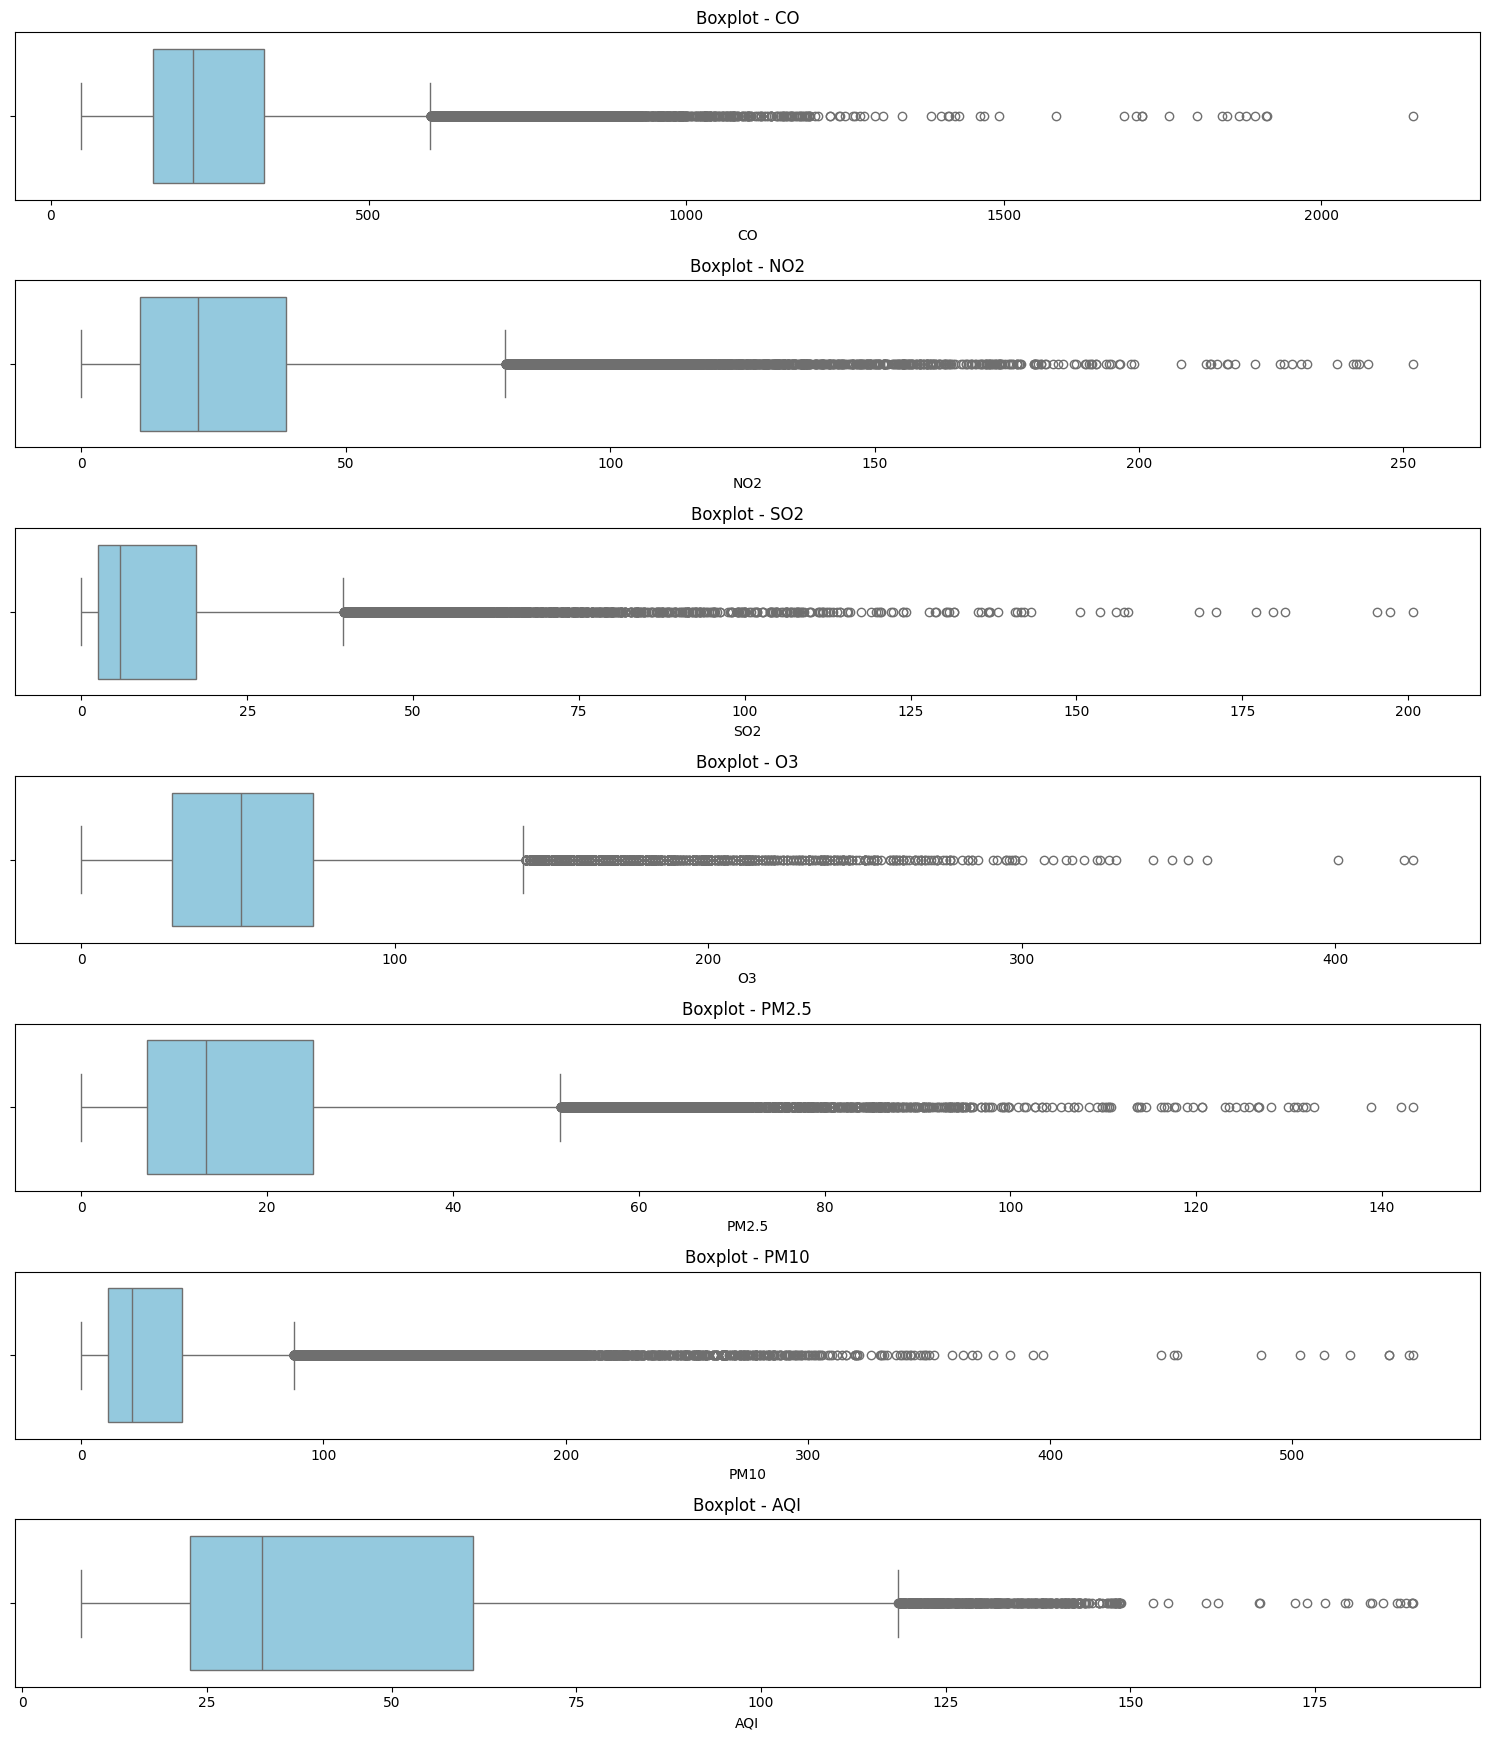

In [38]:
numerical_cols = air_quality.select_dtypes(include='number').columns

# Visualisasi boxplot untuk setiap kolom numerik
plt.figure(figsize=(15, len(numerical_cols)*2.5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=air_quality[col], color='skyblue')
    plt.title(f'Boxplot - {col}')
    plt.tight_layout()

plt.show()

In [39]:
# Ambil semua kolom numerik
numerical_cols = air_quality.select_dtypes(include='number').columns

# Hapus outlier secara langsung pada air_quality
for col in numerical_cols:
    Q1 = air_quality[col].quantile(0.25)
    Q3 = air_quality[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter baris dalam rentang tanpa outlier
    air_quality = air_quality[(air_quality[col] >= lower_bound) & (air_quality[col] <= upper_bound)]

# Cek hasil
print(f"Ukuran setelah hapus outlier: {air_quality.shape}")


Ukuran setelah hapus outlier: (36814, 9)


In [40]:
air_quality.drop('Date', inplace=True, axis=1)
air_quality.drop('City', inplace=True, axis=1)

In [45]:
air_quality.sample(5)

,CO,NO2,SO2,O3,PM2.5,PM10,AQI
37406,321.0,29.10,5.9,42.0,18.2,26.1,46.066673
13129,198.0,21.30,19.1,52.0,22.1,30.5,38.266666
43923,63.0,3.95,2.6,34.0,16.2,29.7,19.358334
34796,192.0,9.90,3.9,68.0,7.1,11.9,27.200000
40082,246.0,12.50,3.7,81.0,7.8,11.1,40.816666


In [47]:

# Kecualikan kolom target 'AQI'
fitur_input = numerical_cols.drop('AQI')  # atau bisa pakai: [col for col in numerical_cols if col != 'AQI']

# Inisialisasi scaler dan fit_transform ke fitur input saja
ss = StandardScaler()
air_quality[fitur_input] = ss.fit_transform(air_quality[fitur_input])


In [ ]:
air_quality.describe()

,CO,NO2,SO2,O3,PM2.5,PM10,AQI
count,3.681400e+04,3.681400e+04,3.681400e+04,3.681400e+04,3.681400e+04,3.681400e+04,36814.000000
mean,-1.235257e-17,6.176283e-18,1.544071e-18,3.705770e-17,-1.254557e-17,4.941026e-17,28.998094
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,12.127973
min,-1.683174e+00,-1.355887e+00,-9.205907e-01,-1.834039e+00,-1.618929e+00,-1.581803e+00,8.000000
25%,-7.148458e-01,-7.700485e-01,-6.281422e-01,-7.440288e-01,-7.640439e-01,-7.573207e-01,20.400000
50%,-1.827973e-01,-2.523307e-01,-3.934138e-01,-5.368922e-02,-2.481648e-01,-2.420194e-01,25.760000
75%,4.875838e-01,5.719304e-01,1.568512e-01,6.003167e-01,5.625024e-01,5.449863e-01,34.666668
max,4.158719e+00,3.514747e+00,4.112602e+00,3.071006e+00,4.158917e+00,3.514996e+00,61.683330


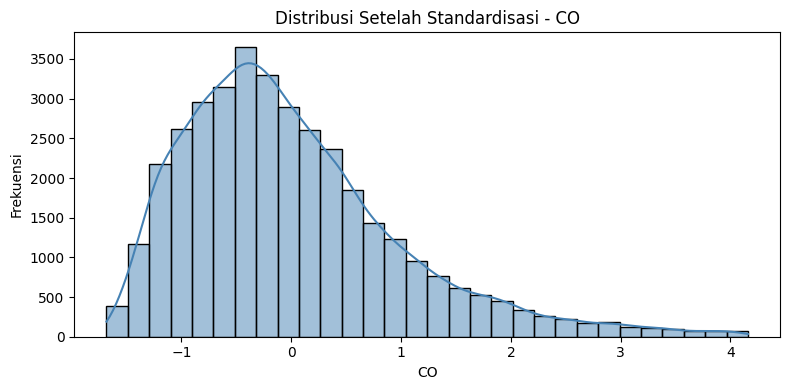

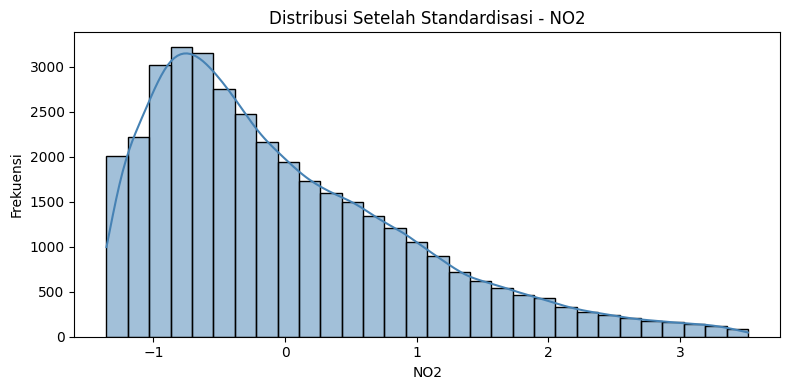

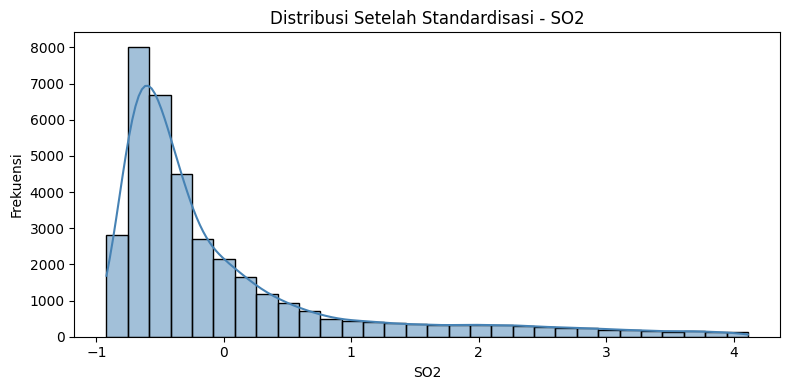

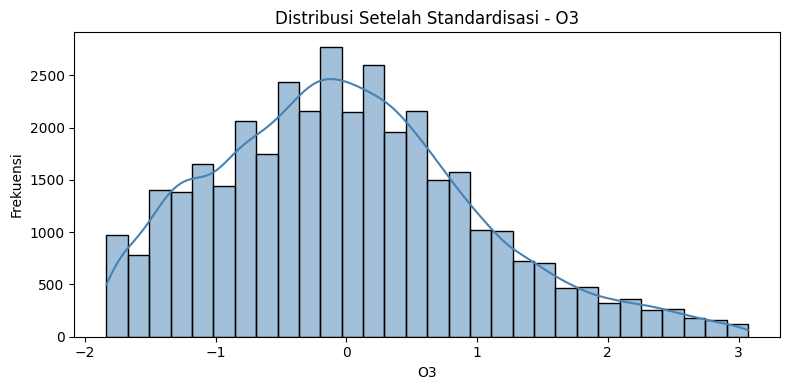

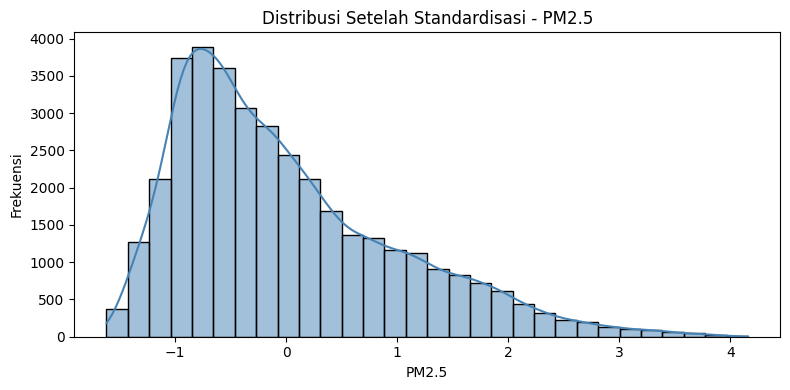

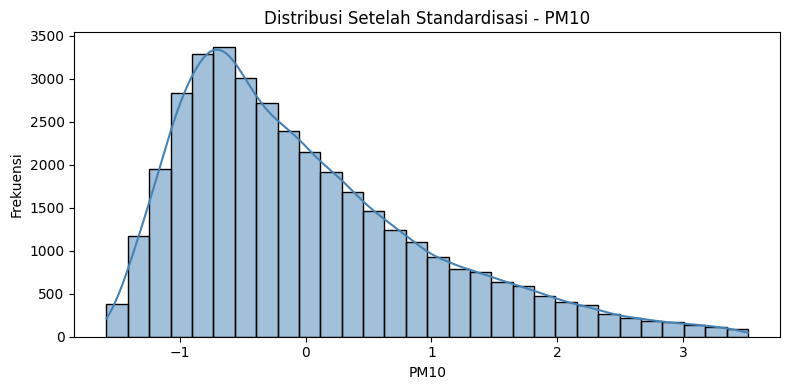

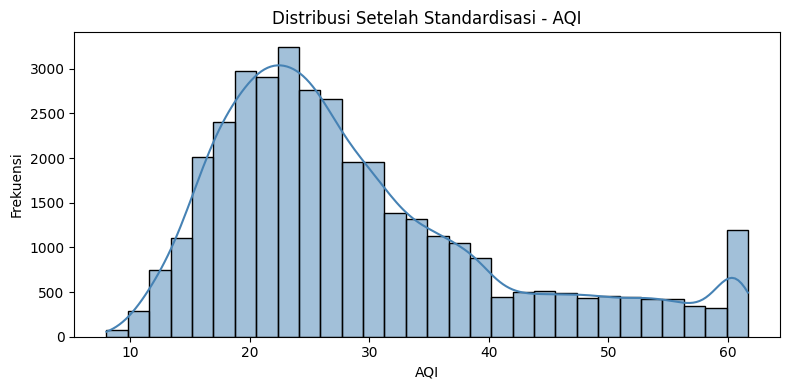

In [49]:
# Ambil ulang kolom numerik
numerical_cols = air_quality.select_dtypes(include='number').columns

# Visualisasi distribusi (histogram) setelah scaling
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=air_quality, x=col, kde=True, color='steelblue', bins=30)
    plt.title(f'Distribusi Setelah Standardisasi - {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()


In [50]:
air_quality.to_csv('air_quality_cleaned.csv', index=False)